# Car Price Prediction Model
# Mohan Dev Vashisht 
# T - 10 (01315611622)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [8]:
# Data collection and processing 

In [9]:
car_dataset = pd.read_csv(r"C:\Users\LENOVO\Downloads\car data.csv")
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
car_dataset.shape

(301, 9)

In [12]:
#getting info about dataset
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [13]:
# checking missing values

In [14]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
#checking distribution of categorical data

In [16]:
car_dataset.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [17]:
car_dataset.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [18]:
car_dataset.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [19]:
# encoding the categorical data

In [20]:
# fuel_type column
car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer':0,'Individual':1,}},inplace=True)
car_dataset.replace({'Transmission': {'Manual':0,'Automatic':1,'CNG':2}},inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25740\2426620007.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25740\2426620007.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer':0,'Individual':1,}},inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25740\2426620007.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [21]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [22]:
# splitting dataset into training and testing data

In [23]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis = 1)
Y = car_dataset['Selling_Price']
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [24]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
# splitting training and testing data

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.1, random_state =2)

In [27]:
# model training : 1. Linear Regression

In [28]:
lin_reg_model =LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [29]:
# Model Evalutation

In [30]:
training_data_prediction = lin_reg_model.predict(X_train)

In [31]:
# R square error 

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lin_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

 R sqaure error score:  0.8427856123435794


In [33]:
# visualize the actual and predicted prices

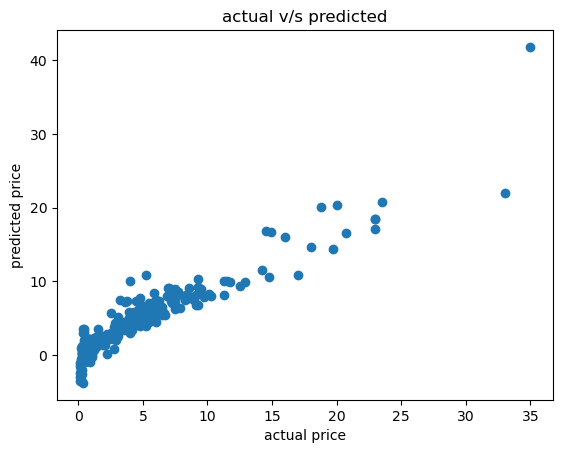

In [55]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual v/s predicted")
plt.show()

In [138]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


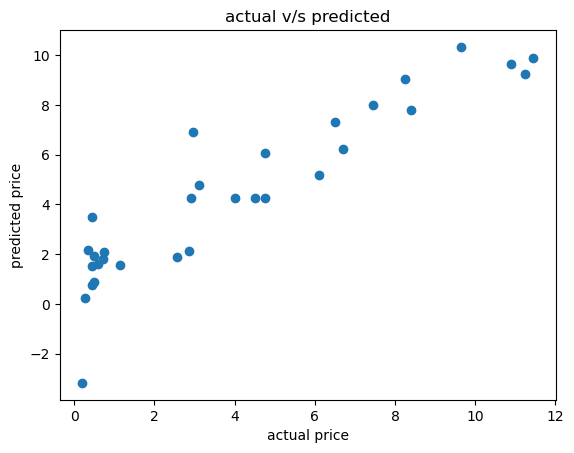

In [65]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual v/s predicted")
plt.show()

In [103]:
lin_reg_model.score(X_test, Y_test)* 100

83.6576671502687

In [122]:
r_2 = lin_reg_model.score(X_train, Y_train) *100
r_2

87.99451660493705

In [ ]:
# Implementing lasso Regression

In [77]:
# loading the linear regression model
lass_reg_model = Lasso()

In [83]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [85]:
training_data_prediction = lass_reg_model.predict(X_train)

In [160]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)
r_4 = error_score*100
r_4

R squared Error :  0.8427856123435794


84.27856123435794

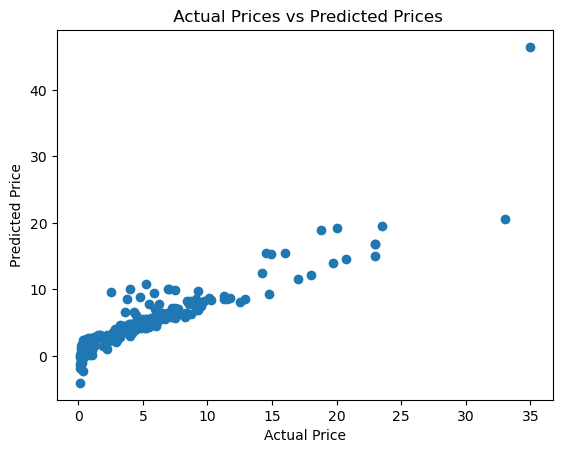

In [89]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [107]:
test_data_prediction = lass_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


In [124]:
r_3 = error_score*100
r_3

87.09167941173195

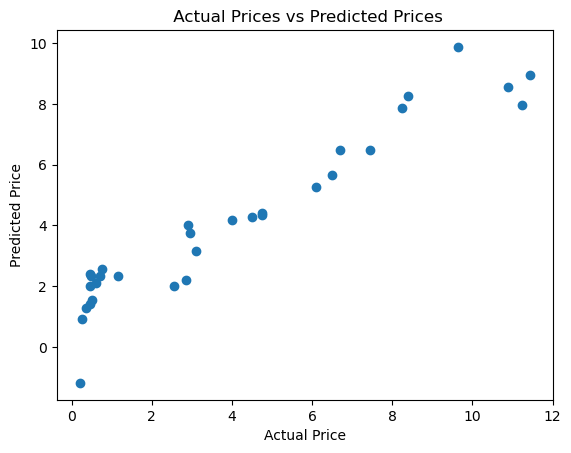

In [97]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

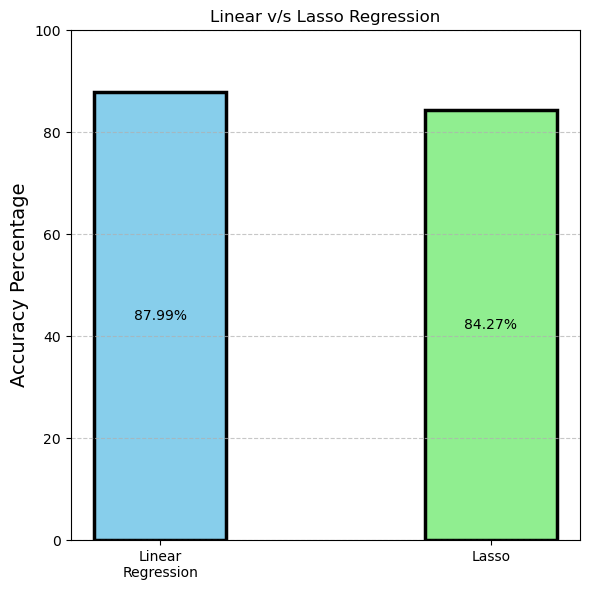

In [162]:
data = {'Linear\nRegression' : r_2,'Lasso' : r_4}
model = list(data.keys())
values = list(data.values())

plt.figure(figsize=(6,6) , dpi =100)
plt.bar(model, values, 
        width=0.4 ,
        color=['skyblue', 'lightgreen'],
        edgecolor='black',
        linewidth=2.5
       )
plt.ylim(0,100)
for i, val in enumerate(values):
    plt.text(i, val / 2, str(val)[:5]+'%', ha='center', va='center')
plt.title("Linear v/s Lasso Regression")
plt.ylabel("Accuracy Percentage" , fontsize=14)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()